In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs=torch.ones(6)/6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [2]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([1., 1., 2., 1., 3., 2.])

In [3]:
counts=multinomial.Multinomial(1000,fair_probs).sample()
counts/1000

tensor([0.1650, 0.1380, 0.1820, 0.1740, 0.1760, 0.1650])

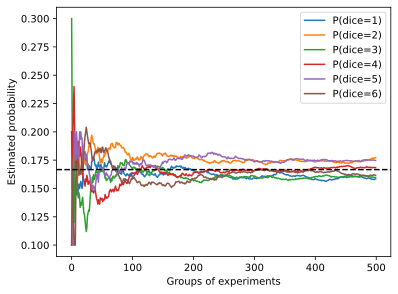

In [4]:
counts=multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdim=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=("P(dice="+str(i+1)+")"))
d2l.plt.axhline(y=1.0/6,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

# 22.6. Random Variables

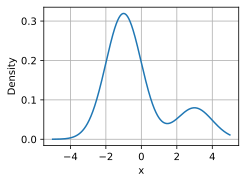

In [5]:
torch.pi = torch.acos(torch.zeros(1)).item() * 2  # Define pi in torch

# Plot the probability density function for some random variable
x = torch.arange(-5, 5, 0.01)
p = 0.2*torch.exp(-(x - 3)**2 / 2)/torch.sqrt(2 * torch.tensor(torch.pi)) + \
    0.8*torch.exp(-(x + 1)**2 / 2)/torch.sqrt(2 * torch.tensor(torch.pi))

d2l.plot(x, p, 'x', 'Density')

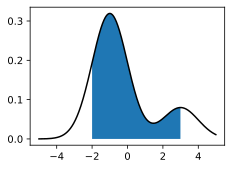

'approximate Probability: 0.773617148399353'

In [6]:
# Approximate probability using numerical integration
epsilon = 0.01
d2l.set_figsize()
d2l.plt.plot(x, p, color='black')
d2l.plt.fill_between(x.tolist()[300:800], p.tolist()[300:800])
d2l.plt.show()

f'approximate Probability: {torch.sum(epsilon*p[300:800])}'

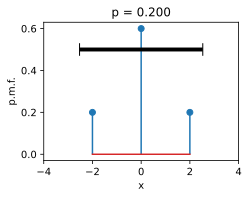

In [7]:
# Define a helper to plot these figures
def plot_chebyshev(a, p):
    d2l.set_figsize()
    d2l.plt.stem([a-2, a, a+2], [p, 1-2*p, p], use_line_collection=True)
    d2l.plt.xlim([-4, 4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')

    d2l.plt.hlines(0.5, a - 4 * torch.sqrt(2 * p),
                   a + 4 * torch.sqrt(2 * p), 'black', lw=4)
    d2l.plt.vlines(a - 4 * torch.sqrt(2 * p), 0.53, 0.47, 'black', lw=1)
    d2l.plt.vlines(a + 4 * torch.sqrt(2 * p), 0.53, 0.47, 'black', lw=1)
    d2l.plt.title(f'p = {p:.3f}')

    d2l.plt.show()

# Plot interval when p > 1/8
plot_chebyshev(0.0, torch.tensor(0.2))

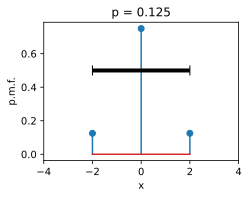

In [8]:
# Plot interval when p = 1/8
plot_chebyshev(0.0, torch.tensor(0.125))

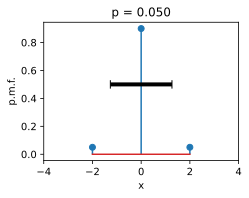

In [9]:
# Plot interval when p < 1/8
plot_chebyshev(0.0, torch.tensor(0.05))

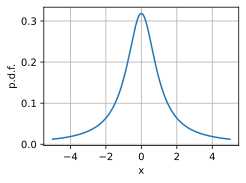

In [10]:
# Plot the Cauchy distribution p.d.f.
x = torch.arange(-5, 5, 0.01)
p = 1/(torch.pi*(1 + x**2))

d2l.plot(x, p, 'x', 'p.d.f.')

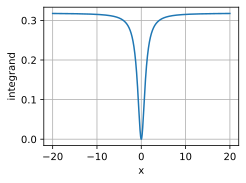

In [11]:
x = torch.arange(-20, 20, 0.01)
p = x**2 / (torch.pi*(1 + x**2))

d2l.plot(x, p, 'x', 'integrand')

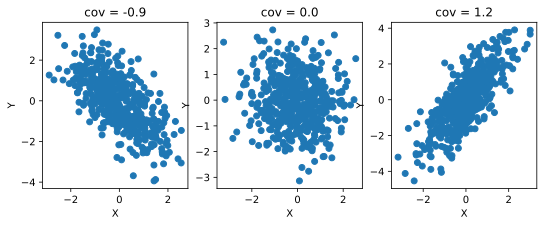

In [12]:
# Plot a few random variables adjustable covariance
covs = [-0.9, 0.0, 1.2]
d2l.plt.figure(figsize=(12, 3))
for i in range(3):
    X = torch.randn(500)
    Y = covs[i]*X + torch.randn(500)

    d2l.plt.subplot(1, 4, i+1)
    d2l.plt.scatter(X.numpy(), Y.numpy())
    d2l.plt.xlabel('X')
    d2l.plt.ylabel('Y')
    d2l.plt.title(f'cov = {covs[i]}')
d2l.plt.show()

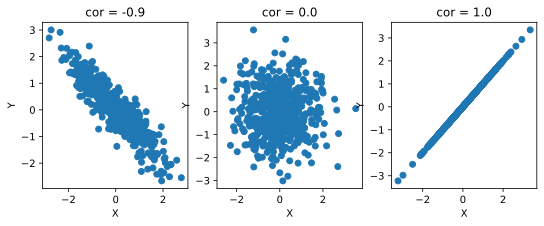

In [13]:
# Plot a few random variables adjustable correlations
cors = [-0.9, 0.0, 1.0]
d2l.plt.figure(figsize=(12, 3))
for i in range(3):
    X = torch.randn(500)
    Y = cors[i] * X + torch.sqrt(torch.tensor(1) -
                                 cors[i]**2) * torch.randn(500)

    d2l.plt.subplot(1, 4, i + 1)
    d2l.plt.scatter(X.numpy(), Y.numpy())
    d2l.plt.xlabel('X')
    d2l.plt.ylabel('Y')
    d2l.plt.title(f'cor = {cors[i]}')
d2l.plt.show()

# 22.7. Maximum Likelihood

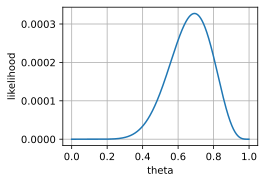

In [14]:
theta = torch.arange(0, 1, 0.001)
p = theta**9 * (1 - theta)**4.

d2l.plot(theta, p, 'theta', 'likelihood')

In [15]:
# Set up our data
n_H = 8675309
n_T = 256245

# Initialize our paramteres
theta = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 1e-9
for iter in range(100):
    loss = -(n_H * torch.log(theta) + n_T * torch.log(1 - theta))
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
    theta.grad.zero_()

# Check output
theta, n_H / (n_H + n_T)

(tensor(0.9713, requires_grad=True), 0.9713101437890875)

# 22.8. Distributions
Bernoulli

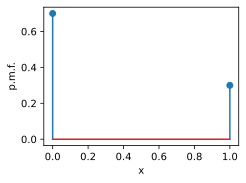

In [16]:
p = 0.3

d2l.set_figsize()
d2l.plt.stem([0, 1], [1 - p, p], use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

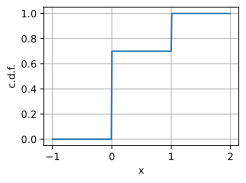

In [17]:
x = torch.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x > 1 else 1 - p

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

In [18]:
1*(torch.rand(10, 10) < p)

tensor([[1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Discrete Uniform

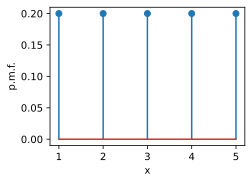

In [19]:
n = 5

d2l.plt.stem([i+1 for i in range(n)], n*[1 / n], use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

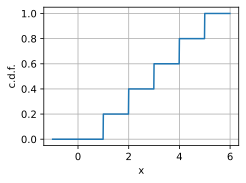

In [20]:
x = torch.arange(-1, 6, 0.01)

def F(x):
    return 0 if x < 1 else 1 if x > n else torch.floor(x) / n

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

In [21]:
torch.randint(1, n+1, size=(10, 10))

tensor([[1, 2, 5, 1, 4, 5, 5, 3, 2, 3],
        [2, 2, 2, 5, 1, 4, 3, 5, 4, 1],
        [1, 4, 1, 3, 3, 4, 1, 3, 1, 2],
        [3, 4, 4, 5, 1, 4, 2, 2, 4, 5],
        [5, 4, 3, 3, 3, 4, 3, 5, 4, 3],
        [3, 3, 2, 4, 3, 1, 1, 5, 5, 3],
        [5, 5, 2, 3, 5, 4, 3, 3, 2, 4],
        [2, 5, 1, 4, 3, 1, 4, 4, 2, 5],
        [2, 5, 3, 4, 3, 4, 1, 4, 4, 2],
        [1, 2, 3, 4, 5, 2, 4, 1, 2, 2]])

Continuous Uniform

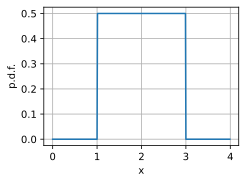

In [22]:
a, b = 1, 3

x = torch.arange(0, 4, 0.01)
p = (x > a).type(torch.float32)*(x < b).type(torch.float32)/(b-a)
d2l.plot(x, p, 'x', 'p.d.f.')

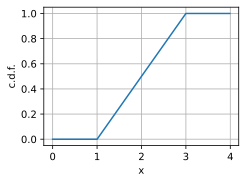

In [23]:
def F(x):
    return 0 if x < a else 1 if x > b else (x - a) / (b - a)

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

In [24]:
(b - a) * torch.rand(10, 10) + a

tensor([[2.3620, 1.9245, 1.1768, 1.0594, 2.7299, 1.2494, 2.1755, 1.8238, 1.4347,
         2.9662],
        [1.6773, 1.4640, 1.9798, 2.2243, 2.9770, 1.2877, 2.7995, 2.4179, 1.6359,
         1.1420],
        [1.9870, 2.3687, 2.4937, 1.0947, 2.0890, 1.6982, 2.1523, 2.1961, 2.7698,
         2.3166],
        [2.1652, 1.0673, 1.3857, 1.2950, 2.9061, 1.8638, 2.8823, 2.0719, 1.4123,
         1.3182],
        [1.8360, 1.9455, 2.3699, 1.4860, 1.2471, 1.9945, 2.0947, 1.2856, 1.5289,
         1.5854],
        [2.0280, 2.8554, 2.3512, 2.6448, 1.6959, 2.3634, 1.7997, 1.6964, 1.1430,
         2.0214],
        [2.3420, 1.0739, 2.2383, 1.4809, 2.8274, 1.0065, 2.3314, 2.4142, 1.0658,
         2.8798],
        [1.0001, 1.5217, 2.2438, 2.1589, 1.4174, 1.0792, 2.5789, 1.8857, 1.9373,
         1.0383],
        [1.8075, 2.8706, 1.9162, 2.0201, 2.1226, 2.5117, 1.7688, 2.8572, 2.2441,
         1.6796],
        [1.2729, 1.6291, 1.5339, 2.2918, 1.5294, 2.7542, 1.5134, 1.0826, 1.1665,
         2.5498]])

Binomial

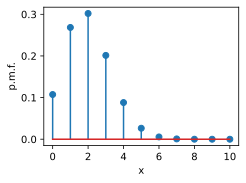

In [25]:
n, p = 10, 0.2

# Compute binomial coefficient
def binom(n, k):
    comb = 1
    for i in range(min(k, n - k)):
        comb = comb * (n - i) // (i + 1)
    return comb

pmf = torch.tensor([p**i * (1-p)**(n - i) * binom(n, i) for i in range(n + 1)])

d2l.plt.stem([i for i in range(n + 1)], pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

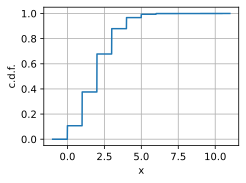

In [26]:
x = torch.arange(-1, 11, 0.01)
cmf = torch.cumsum(pmf, dim=0)

def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, torch.tensor([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [27]:
m = torch.distributions.binomial.Binomial(n, p)
m.sample(sample_shape=(10, 10))

tensor([[4., 2., 3., 0., 0., 1., 2., 0., 3., 1.],
        [3., 2., 1., 2., 1., 4., 2., 0., 1., 2.],
        [2., 1., 1., 1., 1., 1., 0., 1., 2., 2.],
        [2., 4., 2., 3., 1., 4., 1., 0., 3., 2.],
        [0., 4., 2., 5., 1., 4., 1., 4., 1., 0.],
        [2., 2., 2., 1., 3., 4., 3., 4., 4., 0.],
        [2., 1., 2., 1., 3., 2., 1., 1., 2., 2.],
        [1., 2., 3., 3., 3., 5., 2., 0., 3., 1.],
        [1., 1., 0., 1., 2., 6., 5., 3., 2., 2.],
        [4., 5., 1., 3., 2., 4., 3., 2., 1., 2.]])

Poisson

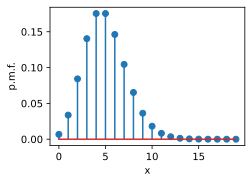

In [28]:
from math import factorial

lam = 5.0
xs = [i for i in range(20)]
pmf = torch.tensor([torch.exp(torch.tensor(-lam)) * lam**k
                    / factorial(k) for k in xs])

d2l.plt.stem(xs, pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

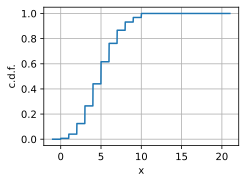

In [29]:
x = torch.arange(-1, 21, 0.01)
cmf = torch.cumsum(pmf, dim=0)
def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, torch.tensor([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [30]:
m = torch.distributions.poisson.Poisson(lam)
m.sample((10, 10))

tensor([[ 1.,  6.,  0.,  4.,  1.,  1.,  4.,  3.,  2.,  7.],
        [12.,  8.,  5.,  8.,  3.,  1.,  7.,  6.,  4.,  0.],
        [ 7.,  6.,  6.,  8.,  3.,  5.,  2.,  5.,  0.,  3.],
        [ 3.,  4.,  5., 10.,  6.,  4.,  2.,  6.,  2.,  4.],
        [ 2., 10.,  3.,  7.,  6.,  7.,  2.,  6.,  5.,  3.],
        [ 7.,  4.,  5.,  5.,  6.,  7.,  9.,  3.,  2.,  2.],
        [ 2.,  2.,  3.,  7.,  5.,  6.,  9.,  1.,  3.,  3.],
        [ 4.,  7.,  4.,  6.,  3.,  3.,  1.,  7.,  3.,  2.],
        [ 3.,  3.,  7.,  7.,  6.,  8.,  7.,  1.,  7.,  4.],
        [ 6.,  4.,  6.,  4.,  5.,  7.,  5.,  4.,  4.,  5.]])

Gaussian

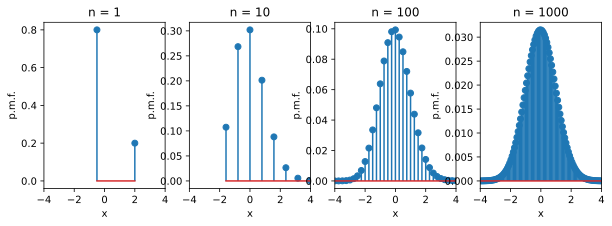

In [31]:
p = 0.2
ns = [1, 10, 100, 1000]
d2l.plt.figure(figsize=(10, 3))
for i in range(4):
    n = ns[i]
    pmf = torch.tensor([p**i * (1-p)**(n-i) * binom(n, i)
                        for i in range(n + 1)])
    d2l.plt.subplot(1, 4, i + 1)
    d2l.plt.stem([(i - n*p)/torch.sqrt(torch.tensor(n*p*(1 - p)))
                  for i in range(n + 1)], pmf,
                 use_line_collection=True)
    d2l.plt.xlim([-4, 4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')
    d2l.plt.title("n = {}".format(n))
d2l.plt.show()

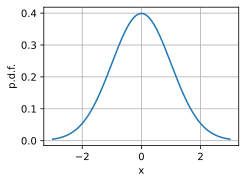

In [32]:
mu, sigma = 0, 1

x = torch.arange(-3, 3, 0.01)
p = 1 / torch.sqrt(torch.tensor(2 * torch.pi * sigma**2)) * torch.exp(
    -(x - mu)**2 / (2 * sigma**2))

d2l.plot(x, p, 'x', 'p.d.f.')

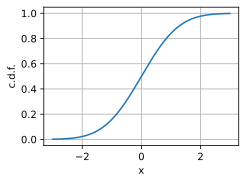

In [33]:
from math import erf

def phi(x):
    return (1.0 + erf((x - mu) / (sigma * torch.sqrt(torch.tensor(2.))))) / 2.0

d2l.plot(x, torch.tensor([phi(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [34]:
torch.normal(mu, sigma, size=(10, 10))

tensor([[ 0.3677,  1.0624, -1.2067, -0.5763,  0.6726,  0.0151,  0.1592,  1.3906,
         -0.0063, -0.6206],
        [-0.2370,  0.1901, -1.3418,  0.5592,  0.2327,  1.6085,  0.9103, -0.5322,
         -0.2823,  1.0916],
        [-0.5053, -1.8578,  0.3179,  0.5610, -2.2532,  0.3341, -0.8665, -0.8699,
         -0.5460,  1.6516],
        [ 1.4109, -0.0904, -0.5868, -1.0101, -0.2082,  1.0943, -1.3782,  1.2541,
         -0.7379,  1.0395],
        [ 0.0517, -0.1676, -0.8744,  0.5253,  1.4063,  0.6891, -0.5322, -0.3835,
         -1.8546,  0.7394],
        [ 0.2321, -1.1293,  2.6998, -0.7640,  0.0802,  0.7084,  1.6699,  0.2114,
         -1.4659,  0.3874],
        [ 0.4262,  0.2991,  0.1046, -0.7829, -0.2581, -0.1491, -1.3162,  0.3022,
          1.1797,  0.0174],
        [-0.2576, -1.6968,  0.0726, -0.6992, -0.3551, -2.7253,  0.2072,  2.1899,
          1.6664, -0.8574],
        [-1.3723,  0.1772,  0.2086, -0.1019,  0.9679, -1.8813,  0.0084,  1.7213,
         -0.7133,  1.1564],
        [ 1.3102, -

Exercises

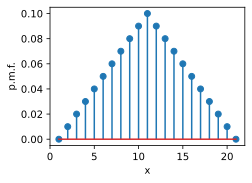

In [35]:
# p.m.f. for a sum of two discrete uniform random variables on n elements

n = 10

def F(i):
    return (i-1)/n**2 if 2<=i<=n+1 else (2*n-i+1)/n**2 if n+2<=i<=2*n else 0

pmf=torch.tensor([F(i+1) for i in range(2*n+1)])
d2l.plt.stem([i+1 for i in range(2*n+1)], pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

tensor([0.0000, 0.0100, 0.0300, 0.0600, 0.1000, 0.1500, 0.2100, 0.2800, 0.3600,
        0.4500, 0.5500, 0.6400, 0.7200, 0.7900, 0.8500, 0.9000, 0.9400, 0.9700,
        0.9900, 1.0000, 1.0000])

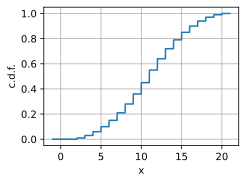

In [36]:
x=torch.arange(-1,21,0.01)
cdf=torch.cumsum(pmf,dim=0)
def G(x):
    return 0 if x < 2 else 1 if x > 2*n else cdf[int(x)-1]

d2l.plot(x, [G(y) for y in x], 'x', 'c.d.f.')
cdf